# USE CASE on HOUSEMARKET DATA
Linear regression & KNeighborsRegressor, with some performance monitoring and plots

In [1]:
# IMPORT ENVIRONNEMENT
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import linear_model

#Chargement des données d'études
houseData = pd.read_csv("house_data.csv", sep=",")


# tentative d'amélioration du modèle

1ere étape : filtration des données 
    - retrait des données non exploitables (vides ou incomplètes)
    - retrait des données trop isolées (décision pseudo arbitraire à partir de la première visualisation)
    
2nd étape : reproduction de la regression linéaire de la baseline. Sur deux paramètre : prix = f(surface)

3eme étape : 1er modèle test
    - utilisation du même outil de regression lineraire mais sur un couple d'arguments en input 
        prix = f(surface;arrondissement)

Résultat : legèrement meilleur de quelques pourcents mais rien de magique (de plus les performances varient selon le decoupage des sets d'entrainement / test) 

4eme étape : 2nd modèle test
    - utilisation de l'outil de regression par voisinage, toujours sur un couple d'arguments en input
        prix = f(surface;arrondissement)

Résultat : bien meilleur de les modèles précédents, avec presque 2 fois moins d'erreurs sur les données d'entrainement et un tiers d'erreurs en moins sur les données de tests.


On selectionnera le modèle par voisinage qui est meilleur qu'une simple approximation linéaire


In [2]:
# on opère une filtration des données en éliminant les données vides ou incomplète
# Avant filtration
houseData.count()
houseData = houseData.dropna()
# Après filtration
houseData.count()

price             822
surface           822
arrondissement    822
dtype: int64

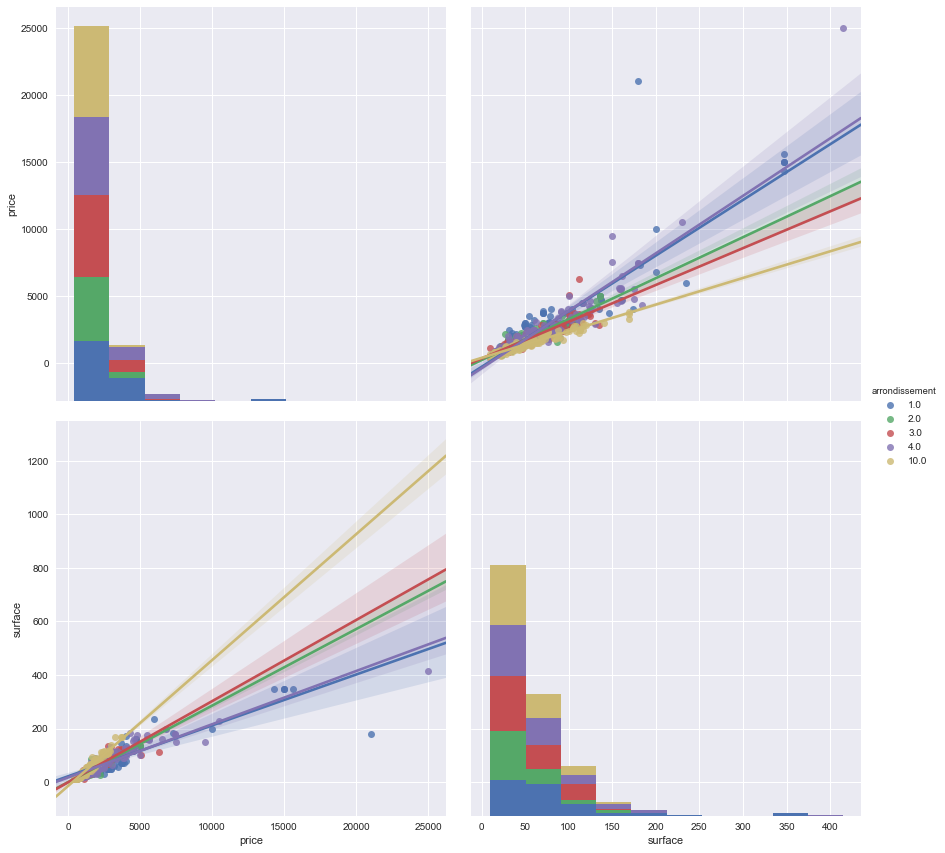

In [3]:
# utilisation de Seaborn pour la visualisation des données brutes
# graphique de corrélation par pair de paramètres entre entre prix/surface, séparé par arrondissement
# l'option kind='reg' donne déja un aperçu des differentes approximation lineaire
sns.pairplot(houseData, hue='arrondissement', size=6,vars=["price", "surface"],kind="reg");

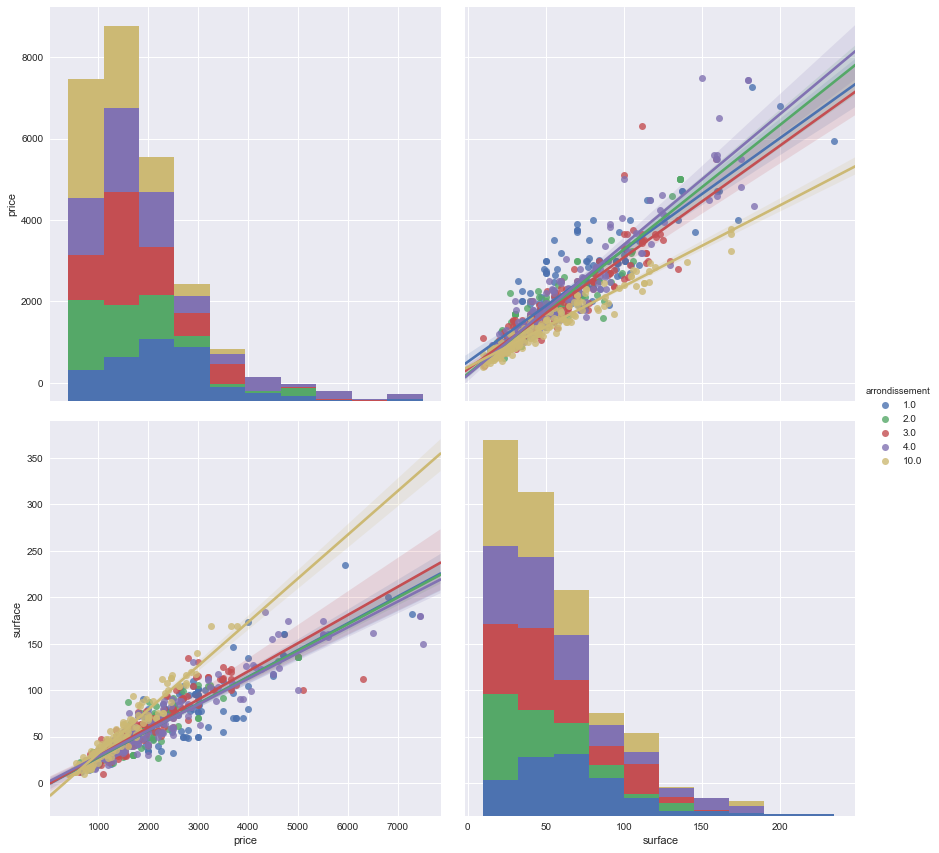

In [4]:
# on opère une seconde filtrations de données sur les seuils de prix supérieur à 13k€
# pour se regrouper sur la majorité des points de données qui sont inférieurs à 8K€ et 200m² de surface
houseData = houseData.loc[houseData.price < 8000]
sns.pairplot(houseData, hue='arrondissement', size=6,vars=["price", "surface"],kind="reg");

Coefficients de regression: 
 [[28.77541718]]
taux derreurs sur données dentrainement (%):  16.861248397617857
taux derreurs sur données de tests (%):  17.312520104043017


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Text(0.5,1,'Price = f(surface)')

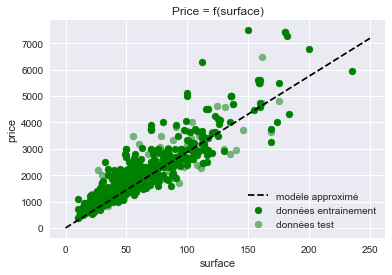

In [8]:
#======= BASELINE========

# le but principal est de determiner un PRIX à partir de SURFACE
# donc le set Data sera composé de surface en ignorant la valeur d'arrondissement
data = houseData.loc[houseData.price >0,['surface']]
# et le set Target sera le prix
target = houseData.loc[houseData.price >0, ['price']]

# CALCUL DE PERFORMANCE DE LA BASELINE (price = f(surface))
# Séparation des données, ratio de séparation : 80% entrainements / 20% tests
dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, train_size=0.8)

# ENTRAINEMENT DU MODULE DE REGRESSION LINEAIRE BASELINE
baseregr = linear_model.LinearRegression()
baseregr.fit(dataTrain,targetTrain)
# les coefficients
print('Coefficients de regression: \n', baseregr.coef_)
# calcul du taux de reussite de l'approximation sur les données d'entrainement
error = (1 - baseregr.score(dataTrain,targetTrain))*100
print('taux d''erreurs sur données d''entrainement (%): ', error)
error = (1 - baseregr.score(dataTest,targetTest))*100
print('taux d''erreurs sur données de tests (%): ', error)

# graphique de la BASELINE
# affichage des données
ax = plt.axes()
ax = ax.set(xlabel=dataTrain.columns[0], ylabel=targetTrain.columns[0],)
plt.scatter(dataTrain,targetTrain,color='green', label='données entrainement')
plt.scatter(dataTest,targetTest,color='green',alpha=0.5, label='données test')
# affichage de l'approximation lineaire 
x=[0,250]
#y=[baseregr.coef_[0,1],baseregr.coef_[0,1] + 250 * baseregr.coef_[0,0]]
y=[0, 250 * baseregr.coef_[0,0]]
#plt.plot(dataTest,price_pred,color='blue', linewidth=1,label='modèle approximé')
# On affiche la droite entre 0 et 250
plt.plot(x, y, linestyle='--', c='#000000',label='modèle approximé')

# habillage
plt.legend(loc='lower right');
plt.title("Price = f(surface)")

taux derreurs sur données dentrainement (%):  15.38588213933998
taux derreurs sur données de tests (%):  12.36019001569969
Coefficients de regression: 
 [[ 27.86338018 -50.43276006]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Text(0.5,1,'Price = f(surface)')

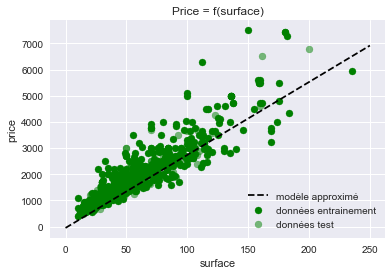

In [13]:
# =============== MODELE AMELIORE 1 =========

# on genere nos sets d'entrainement et de tests à partir des données filtrées
# le but principal est de determiner un PRIX à partir du duo SURFACE/ARRONDISSEMENT
# donc le set Data sera composé de arrondissement/surface
data = houseData.loc[houseData.price >0,['surface','arrondissement']]
# et le set Target sera le prix
target = houseData.loc[houseData.price >0, ['price']]
# Séparation des données entrainements/tests 
# ratio de séparation : 80% entrainements / 20% tests
dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, train_size=0.8)
#dataTrain, dataTest, targetTrain, targetTest

#entrainement module de regression lineaire amélioré
regr = linear_model.LinearRegression()
regr.fit(dataTrain,targetTrain)

# calcul du taux de reussite de l'approximation sur les données d'entrainement
error = (1 - regr.score(dataTrain,targetTrain))*100
print('taux d''erreurs sur données d''entrainement (%): ', error)
error = (1 - regr.score(dataTest,targetTest))*100
print('taux d''erreurs sur données de tests (%): ', error)
# les coefficients
print('Coefficients de regression: \n', regr.coef_)

# graphique
# affichage des données
ax = plt.axes()
ax = ax.set(xlabel=dataTrain.columns[0], ylabel=targetTrain.columns[0],)
plt.scatter(dataTrain[dataTrain.columns[0]],targetTrain,color='green', label='données entrainement')
plt.scatter(dataTest[dataTrain.columns[0]],targetTest,color='green',alpha=0.5, label='données test')
# affichage de l'approximation lineaire 
x=[0,250]
y=[regr.coef_[0,1],regr.coef_[0,1] + 250 * regr.coef_[0,0]]
#y= classifier_modele.predict([1,250])
#plt.plot(dataTest,price_pred,color='blue', linewidth=1,label='modèle approximé')
# On affiche la droite entre 0 et 250
plt.plot(x, y, linestyle='--', c='#000000',label='modèle approximé')

# habillage
plt.legend(loc='lower right');
plt.title("Price = f(surface)")

In [19]:
# ========= MODELE AMELIORE 2==========================
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, train_size=0.8)
classifier_modele = KNeighborsRegressor(n_neighbors=2)
classifier_modele.fit(dataTrain, targetTrain)

# calcul du taux de reussite de l'approximation sur les données d'entrainement
error = (1 - classifier_modele.score(dataTrain,targetTrain))*100
print('taux d''erreurs sur données d''entrainement (%): ', error)
error = (1 - classifier_modele.score(dataTest,targetTest))*100
print('taux d''erreurs sur données de tests (%): ', error)
# les coefficients
#print('Coefficients de regression: \n', classifier_modele.coef_)


taux derreurs sur données dentrainement (%):  7.697520126702195
taux derreurs sur données de tests (%):  11.593915101535979


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
